<a href="https://colab.research.google.com/github/cookiesx123/wine-quality-pred/blob/main/wine_quality_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Wczytanie danych

In [ ]:
df = pd.read_excel('winequality-red.xlsx')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Dobór zmiennych

#### Metoda Quasi-stałych

In [ ]:
def czy_quasi_stala(dane, prog_zmiennosci=0.5):
    srednia = np.mean(dane)
    odchylenie_std = np.std(dane)
    wspolczynnik_zmiennosci = odchylenie_std / srednia

    return wspolczynnik_zmiennosci < prog_zmiennosci

print(czy_quasi_stala(df))

fixed_acidity            True
volatile_acidity         True
citric_acid              True
residual_sugar           True
chlorides                True
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                  True
pH                       True
sulphates                True
alcohol                  True
quality                  True
dtype: bool


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
df=df.drop('free_sulfur_dioxide', axis=1)
df=df.drop('total_sulfur_dioxide', axis=1)

In [ ]:
df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Metoda analizy współczynników korelacji

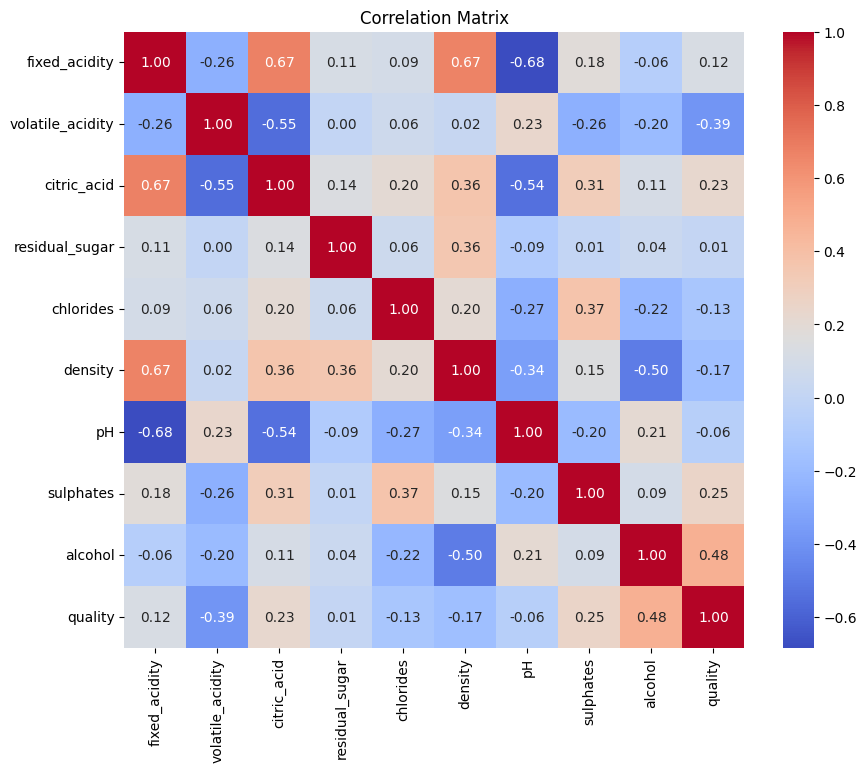

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")#heatmap
plt.title('Correlation Matrix')
plt.show()

In [ ]:
prog = 0.05
korelacje_z_targetem = corr_matrix['quality'].drop('quality')
zmienne_istotne = korelacje_z_targetem[abs(korelacje_z_targetem) > prog].index.tolist()

print("Wybrane zmienne na podstawie macierzy korelacji")
print(zmienne_istotne)

Wybrane zmienne na podstawie macierzy korelacji
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
df=df.drop('residual_sugar', axis=1)

### Obserwacje nietypowe

<Axes: xlabel='quality', ylabel='fixed_acidity'>

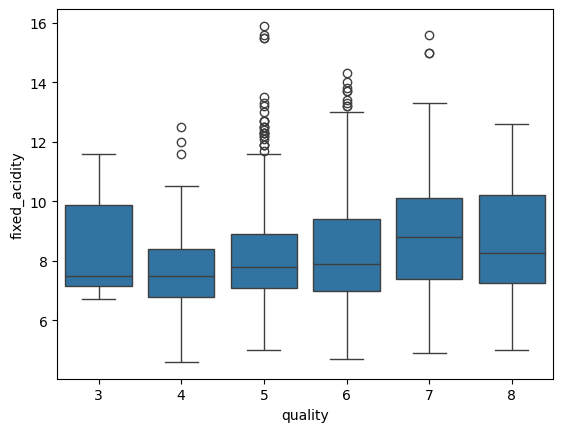

In [ ]:
sns.boxplot(x='quality', y='fixed_acidity', data=df)

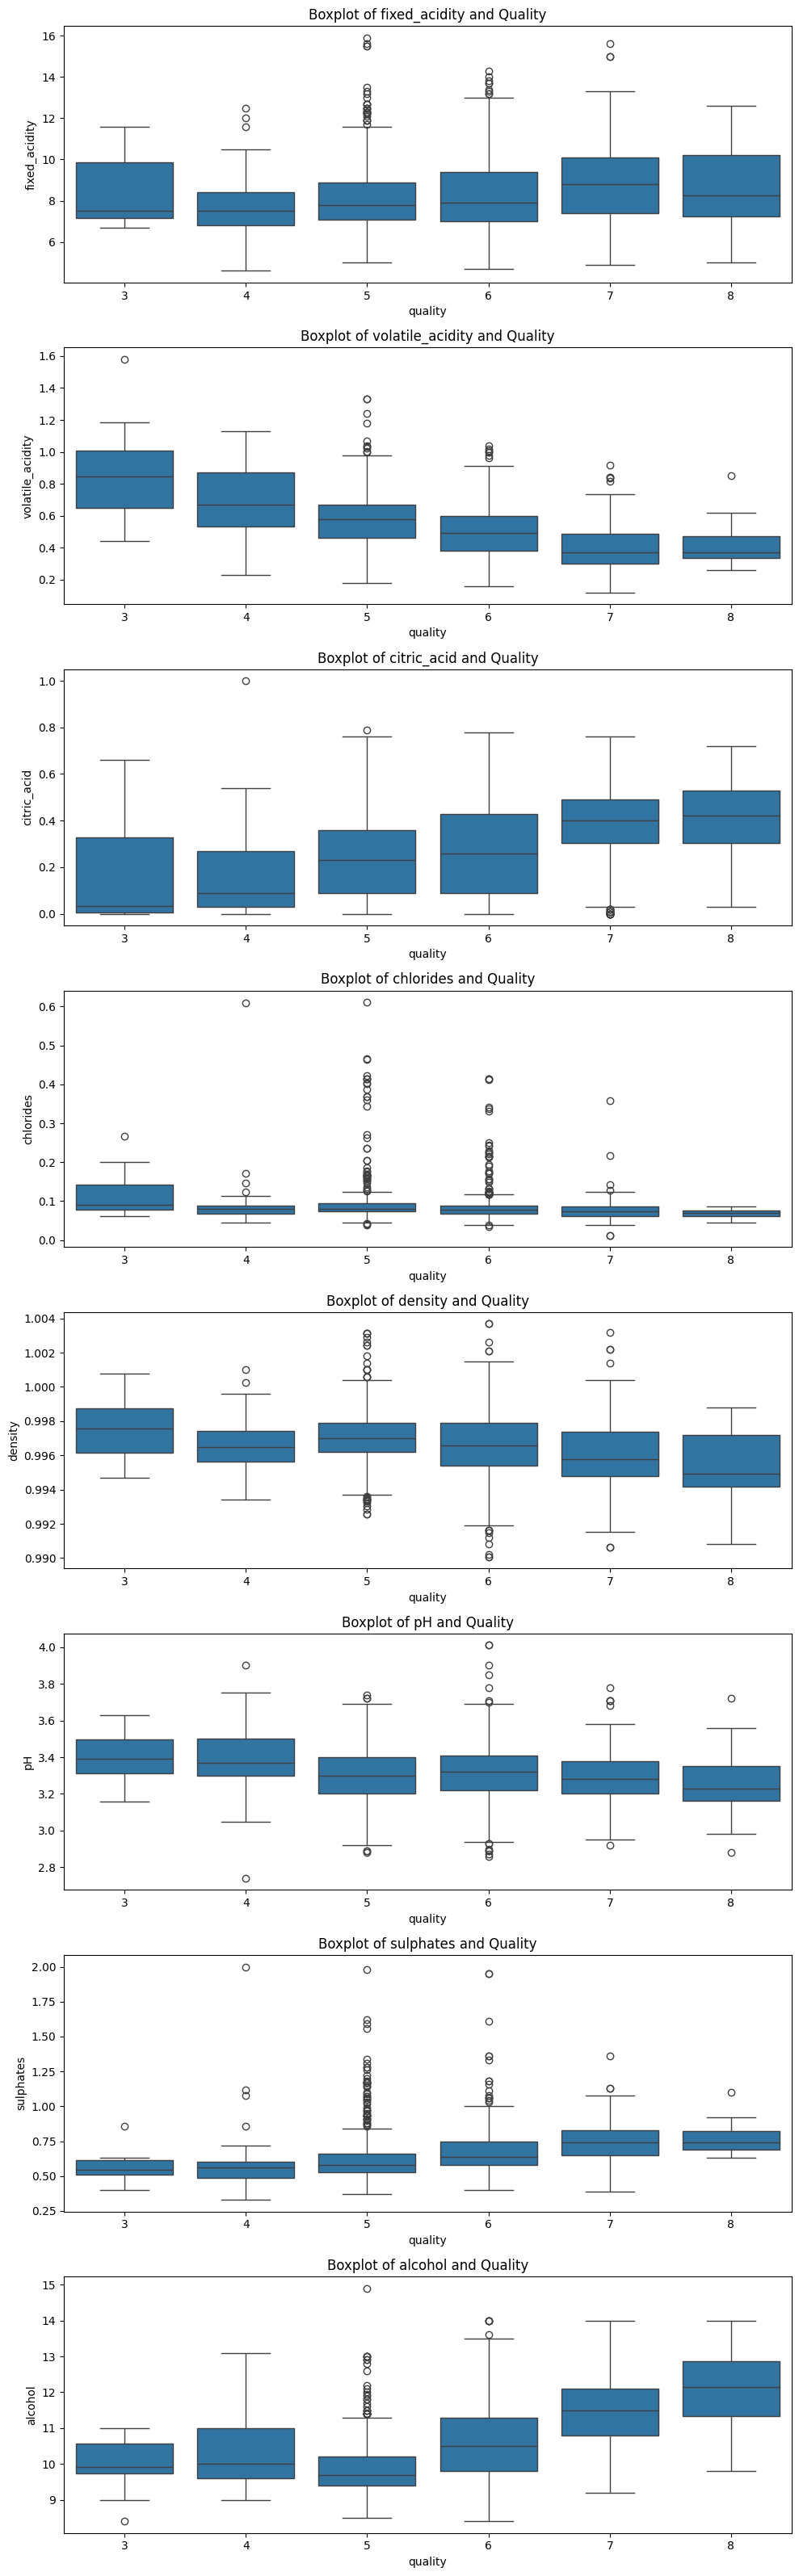

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns.drop('quality')
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 4 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='quality', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} and Quality')

plt.tight_layout()
plt.show()

In [ ]:
!pip install statsmodels==0.13.5
import statsmodels.api as sm
import statsmodels.formula.api as smf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.1 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.


In [ ]:
df_filtered = df.copy()
model = smf.ols('quality ~ fixed_acidity + volatile_acidity + citric_acid + chlorides + density + pH + sulphates + alcohol', data=df).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag
n = df.shape[0]
k = len(model.params)
high_leverage_threshold = 2 * (k + 1) / n
high_leverage_points = df[leverage > high_leverage_threshold]
print(high_leverage_points)

      fixed_acidity  volatile_acidity  citric_acid  chlorides  density    pH  \
13              7.8             0.610         0.29      0.114  0.99740  3.26   
17              8.1             0.560         0.28      0.368  0.99680  3.11   
19              7.9             0.320         0.51      0.341  0.99690  3.04   
38              5.7             1.130         0.09      0.172  0.99400  3.50   
42              7.5             0.490         0.20      0.332  0.99680  3.21   
...             ...               ...          ...        ...      ...   ...   
1374            6.8             0.815         0.00      0.267  0.99471  3.32   
1434           10.2             0.540         0.37      0.214  1.00369  3.18   
1435           10.2             0.540         0.37      0.214  1.00369  3.18   
1570            6.4             0.360         0.53      0.230  0.99340  3.37   
1574            5.6             0.310         0.78      0.074  0.99677  3.39   

      sulphates  alcohol  quality  
13 

<Axes: ylabel='quality'>

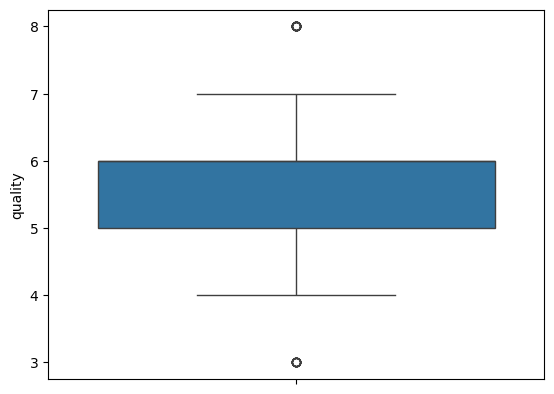

In [ ]:
sns.boxplot(y='quality', data=df)

#### Usuwamy obserwacje wpływowe

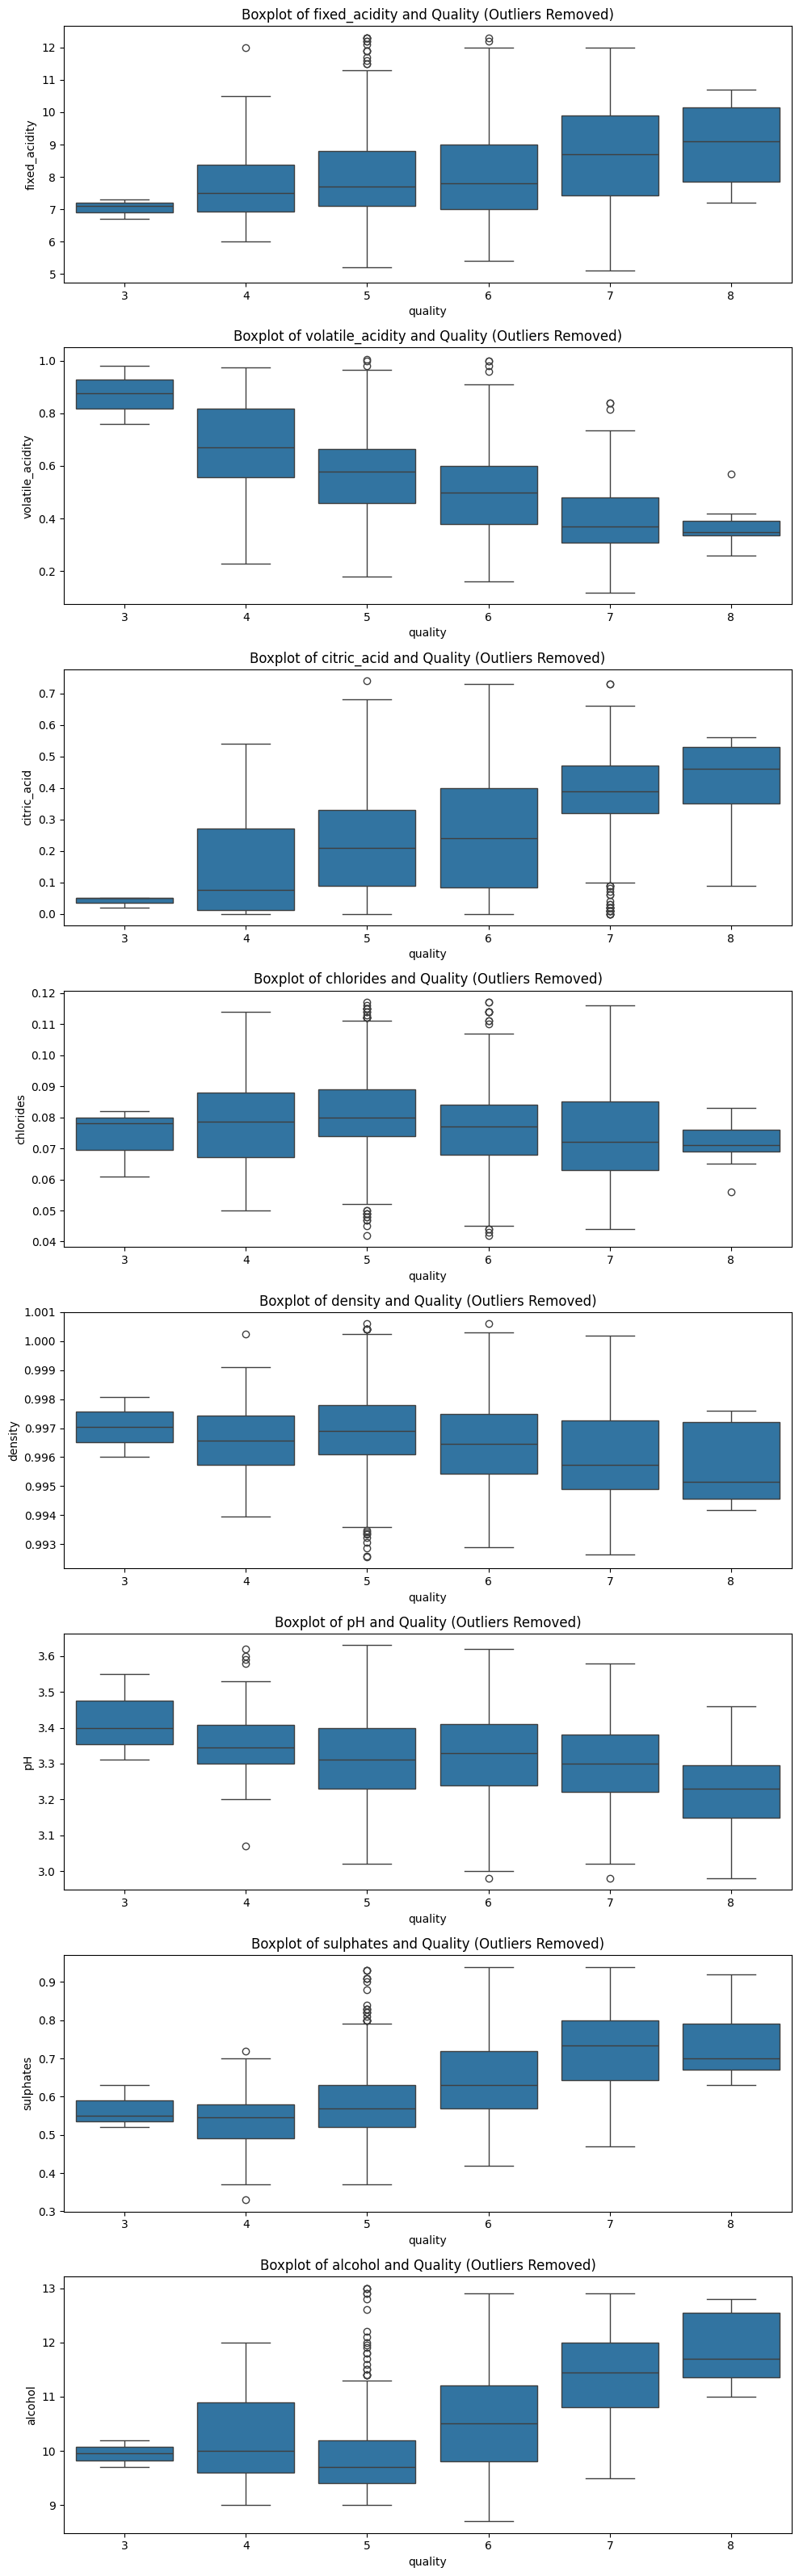

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns.drop('quality')
df = df[leverage <= high_leverage_threshold]
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

for feature in numerical_features:
    df = remove_outliers_iqr(df, feature)


fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 4 * len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='quality', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} and Quality (Outliers Removed)')

plt.tight_layout()
plt.show()

#### Ponowny dobór zmiennych

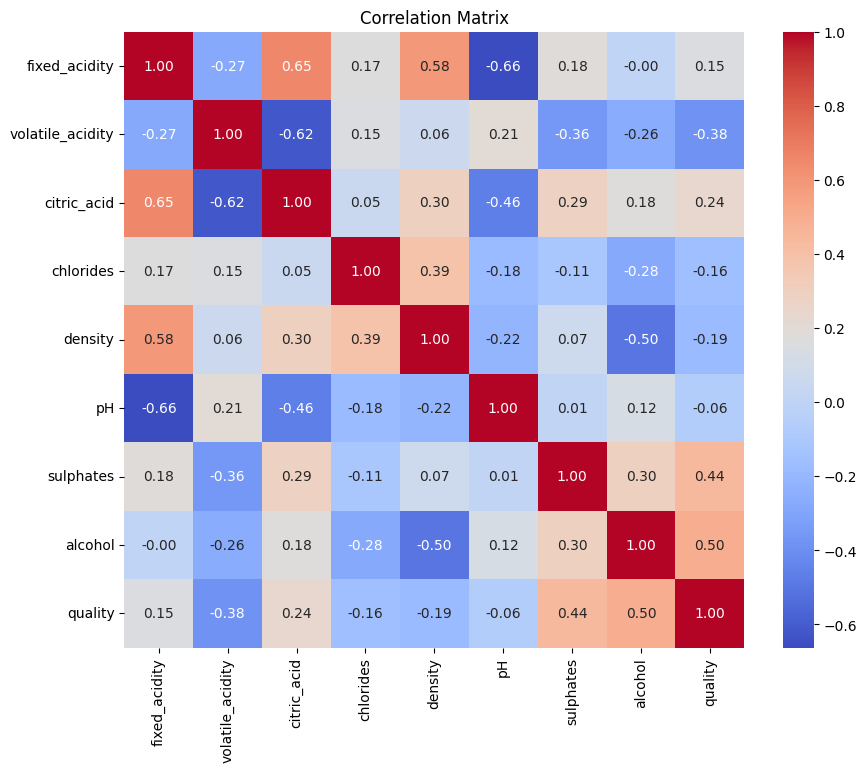

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")#heatmap
plt.title('Correlation Matrix')
plt.show()

In [ ]:
prog = 0.05
korelacje_z_targetem = corr_matrix['quality'].drop('quality')
zmienne_istotne = korelacje_z_targetem[abs(korelacje_z_targetem) > prog].index.tolist()

print("Wybrane zmienne na podstawie macierzy korelacji")
print(zmienne_istotne)

Wybrane zmienne na podstawie macierzy korelacji
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']


Zostawiamy wszystkie zmienne

## Badanie współliniowości

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):

    X = df[features]

    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data


numerical_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

vif_df = calculate_vif(df, numerical_features)
print(vif_df)

features_to_delete = vif_df[vif_df["VIF"] <= 10]["feature"].tolist()
print("\nZmienne do usunięcia:")
print(features_to_delete)

            feature          VIF
0     fixed_acidity    92.783484
1  volatile_acidity    20.797281
2       citric_acid     8.321915
3         chlorides    38.910193
4           density  1858.559556
5                pH  1372.718301
6         sulphates    39.836279
7           alcohol   143.415204

Zmienne do usunięcia:
['citric_acid']


In [ ]:
df=df.drop('citric_acid',axis=1)

In [ ]:
model2 = smf.ols('quality ~ fixed_acidity + volatile_acidity + chlorides + density + pH + sulphates + alcohol', data=df).fit()
print(model2.rsquared)

0.3765619823265266


In [ ]:
df.to_excel('winequality-red-processed.xlsx', index=False)

## Badanie losowości reszt

In [ ]:
import scipy.stats as stats

In [ ]:
def runs_test(data):
  n = len(data)
  median = np.median(data)
  binary_data = np.where(data >= median, 1, 0)

  runs = 0
  for i in range(n - 1):
    if binary_data[i] != binary_data[i + 1]:
      runs += 1
  runs += 1

  n1 = np.sum(binary_data)
  n2 = n - n1
  expected_runs = (2 * n1 * n2) / n + 1
  variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - n)) / (n**2 * (n - 1))

  z_score = (runs - expected_runs) / np.sqrt(variance_runs)

  p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

  return z_score, p_value


residuals = model2.resid
statistic, p_value = runs_test(residuals)

print('Statystyka:', statistic)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
  print('Brak podstaw do odrzucenia hipotezy zerowej o losowości.')
else:
  print('Odrzucamy hipotezę zerową o losowości.')

Statystyka: -3.673761346062177
p-value: 0.00023900597839410231
Odrzucamy hipotezę zerową o losowości.


## Badanie normalności

In [ ]:
from scipy import stats

residuals = model2.resid
statistic, p_value = stats.shapiro(residuals)

print('Statystyka:', statistic)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('Brak podstaw do odrzucenia hipotezy zerowej o normalności rozkładu.')
else:
    print('Odrzucamy hipotezę zerową o normalności rozkładu.')

Statystyka: 0.99090961840668
p-value: 3.64925047450039e-07
Odrzucamy hipotezę zerową o normalności rozkładu.


In [ ]:
residuals = model2.resid
statistic, p_value = stats.shapiro(residuals)

print('Statystyka:', statistic)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('Brak podstaw do odrzucenia hipotezy zerowej o normalności rozkładu.')
else:
    print('Odrzucamy hipotezę zerową o normalności rozkładu.')

Statystyka: 0.99090961840668
p-value: 3.64925047450039e-07
Odrzucamy hipotezę zerową o normalności rozkładu.


##Badanie autokorelacji

eval_env: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/regressionplots.py:429: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


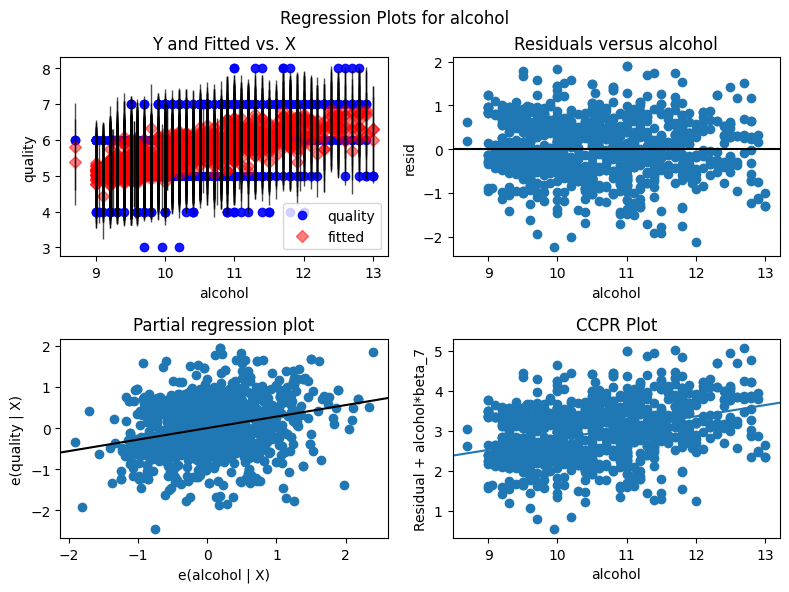

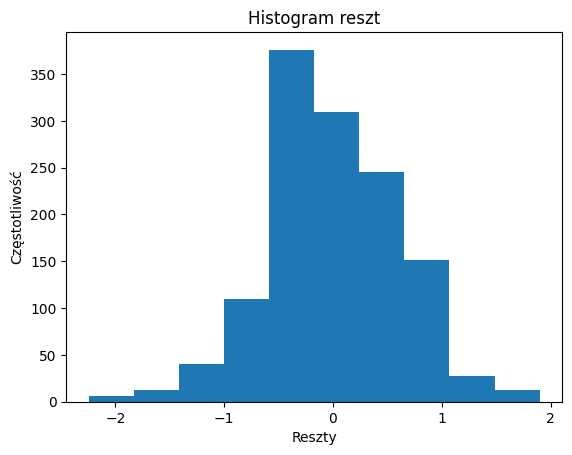

In [ ]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(model2, "alcohol", fig=fig)
plt.show()

plt.hist(model2.resid)
plt.title("Histogram reszt")
plt.xlabel("Reszty")
plt.ylabel("Częstotliwość")
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(model2.resid)
print(f"Statystyka Durbin-Watson: {dw_statistic}")

Statystyka Durbin-Watson: 1.7189565049705007


Jeśli wykres reszt wykazuje losowy wzór, a statystyka Durbin-Watson jest bliska 2, można wnioskować, że nie występuje autokorelacja

In [ ]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

lm_test = acorr_breusch_godfrey(model2, nlags=1)

print('Statystyka LM:', lm_test[0])
print('p-value:', lm_test[1])

alpha = 0.05
if lm_test[1] < alpha:
    print('Odrzucamy hipotezę zerową o braku autokorelacji.')
else:
    print('Brak podstaw do odrzucenia hipotezy zerowej o braku autokorelacji.')

Statystyka LM: 25.628625954053017
p-value: 4.1385417546688516e-07
Odrzucamy hipotezę zerową o braku autokorelacji.


## Próby poprawy modelu

In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,chlorides,density,pH,sulphates,alcohol,quality
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,8.143266,0.524563,0.078664,0.996633,3.321254,0.627098,10.358153,5.625387
std,1.414666,0.165943,0.013808,0.001538,0.126284,0.113470,0.962015,0.772638
min,5.100000,0.120000,0.042000,0.992560,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.400000,0.070000,0.995600,3.230000,0.540000,9.500000,5.000000
50%,7.800000,0.520000,0.078000,0.996600,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.635000,0.087000,0.997600,3.400000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.117000,1.000600,3.630000,0.940000,13.000000,8.000000


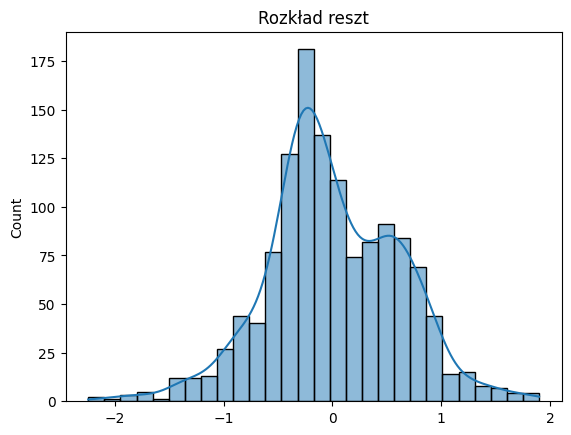

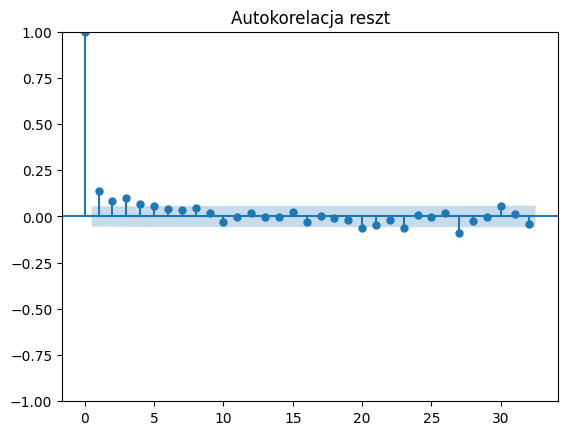

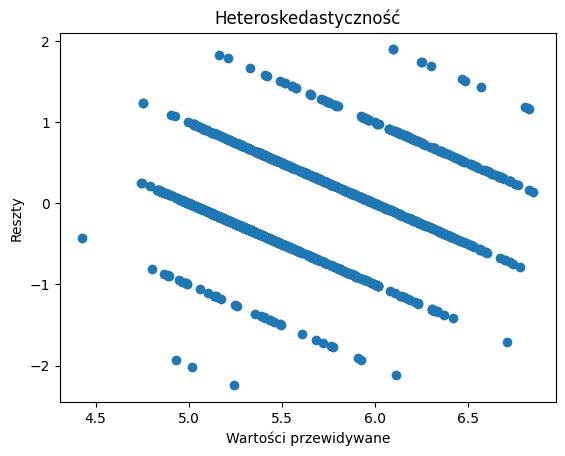

In [ ]:
residuals = model2.resid
sns.histplot(residuals, kde=True)
plt.title('Rozkład reszt')
plt.show()

# 2. Sprawdź autokorelację reszt
sm.graphics.tsa.plot_acf(residuals)
plt.title('Autokorelacja reszt')
plt.show()

# 3. Sprawdź heteroskedastyczność
plt.scatter(model2.fittedvalues, residuals)
plt.title('Heteroskedastyczność')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.show()

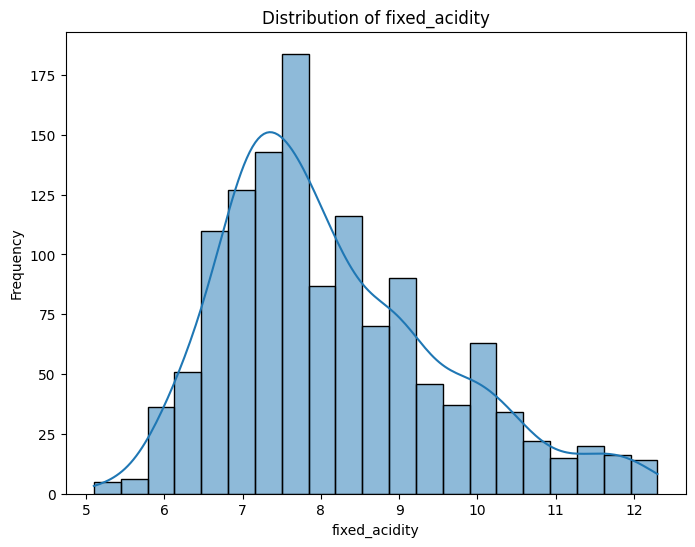

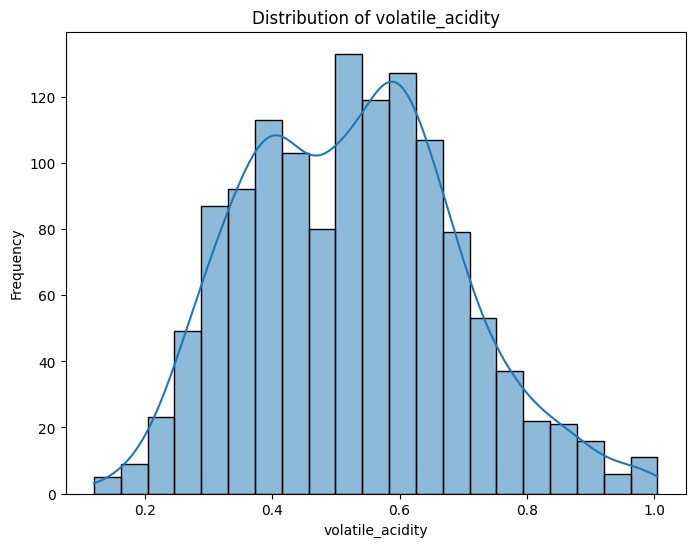

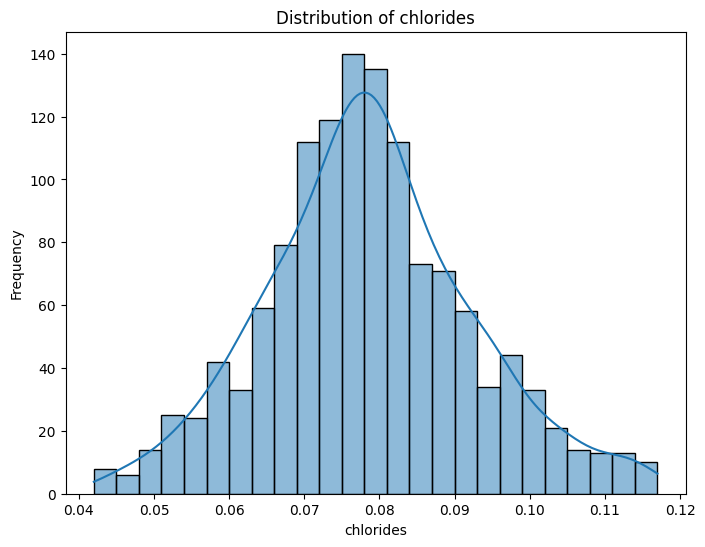

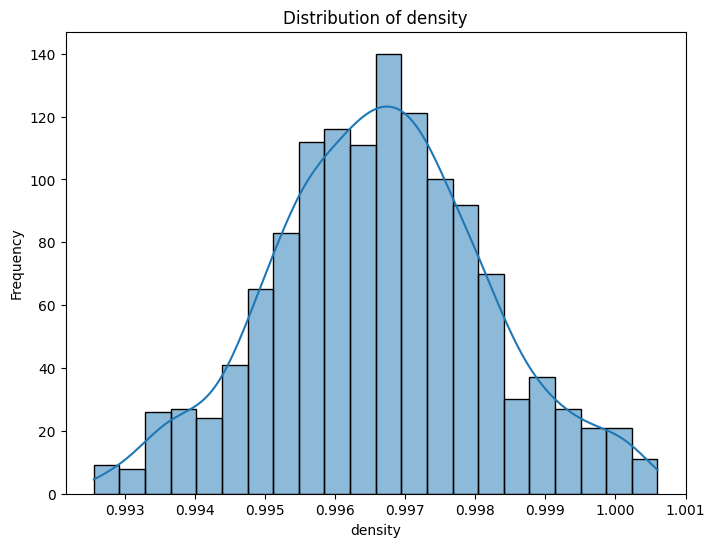

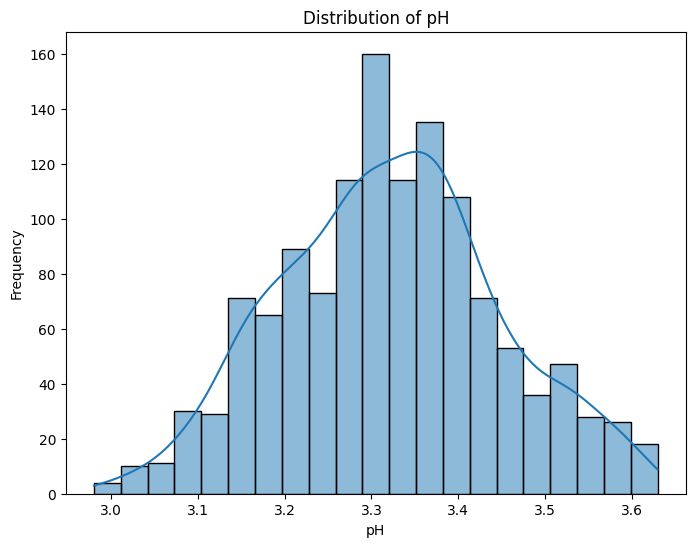

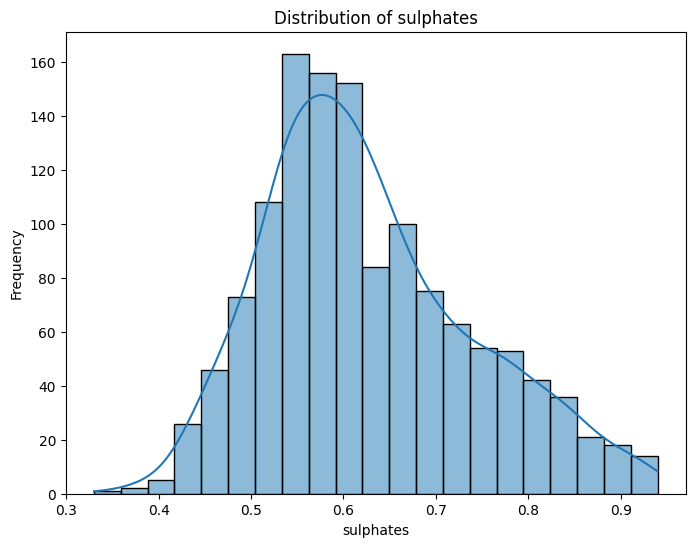

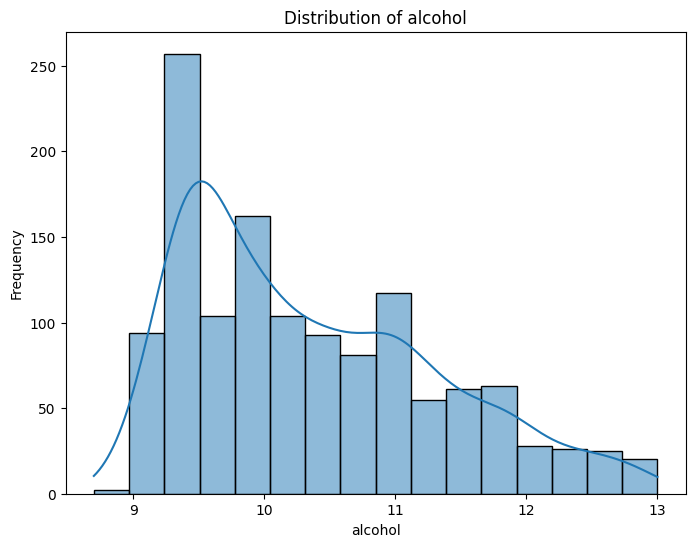

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of explanatory variables
explanatory_vars = ['fixed_acidity', 'volatile_acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

# Create histograms and KDE plots
for var in explanatory_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df['alcohol_log'] = np.log(df['alcohol'])

In [ ]:
model3= smf.ols('quality ~ fixed_acidity + volatile_acidity + chlorides + density + pH + sulphates + alcohol_log', data=df).fit()
print(model3.rsquared)

0.37562992899638525


In [ ]:
def runs_test(data):
  n = len(data)
  median = np.median(data)
  binary_data = np.where(data >= median, 1, 0)

  runs = 0
  for i in range(n - 1):
    if binary_data[i] != binary_data[i + 1]:
      runs += 1
  runs += 1

  n1 = np.sum(binary_data)
  n2 = n - n1
  expected_runs = (2 * n1 * n2) / n + 1
  variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - n)) / (n**2 * (n - 1))

  z_score = (runs - expected_runs) / np.sqrt(variance_runs)

  p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

  return z_score, p_value


residuals = model3.resid
statistic, p_value = runs_test(residuals)

print('Statystyka:', statistic)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
  print('Brak podstaw do odrzucenia hipotezy zerowej o losowości.')
else:
  print('Odrzucamy hipotezę zerową o losowości.')

Statystyka: -3.7850874474580003
p-value: 0.00015365453851368116
Odrzucamy hipotezę zerową o losowości.


In [ ]:
model4= smf.ols('quality ~ chlorides + density + pH + sulphates + alcohol_log', data=df).fit()
print(model4.rsquared)

0.35409632271011027


In [ ]:
def runs_test(data):
  n = len(data)
  median = np.median(data)
  binary_data = np.where(data >= median, 1, 0)

  runs = 0
  for i in range(n - 1):
    if binary_data[i] != binary_data[i + 1]:
      runs += 1
  runs += 1

  n1 = np.sum(binary_data)
  n2 = n - n1
  expected_runs = (2 * n1 * n2) / n + 1
  variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - n)) / (n**2 * (n - 1))

  z_score = (runs - expected_runs) / np.sqrt(variance_runs)

  p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

  return z_score, p_value


residuals = model4.resid
statistic, p_value = runs_test(residuals)

print('Statystyka:', statistic)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
  print('Brak podstaw do odrzucenia hipotezy zerowej o losowości.')
else:
  print('Odrzucamy hipotezę zerową o losowości.')

Statystyka: -5.232326765603706
p-value: 1.6738950314731937e-07
Odrzucamy hipotezę zerową o losowości.


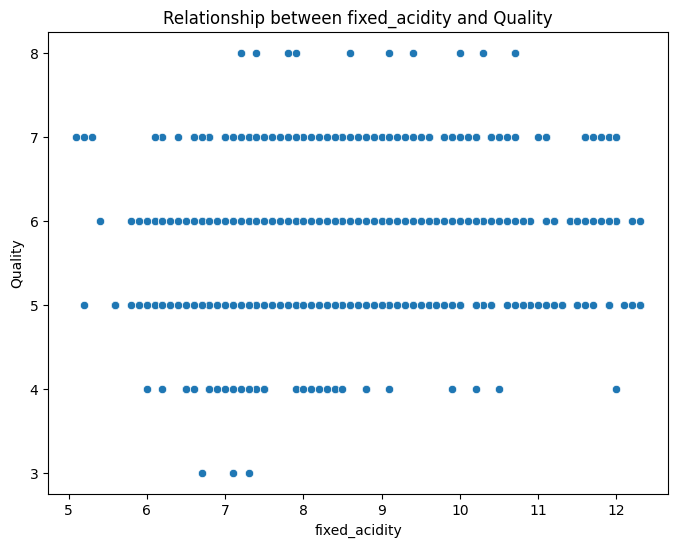

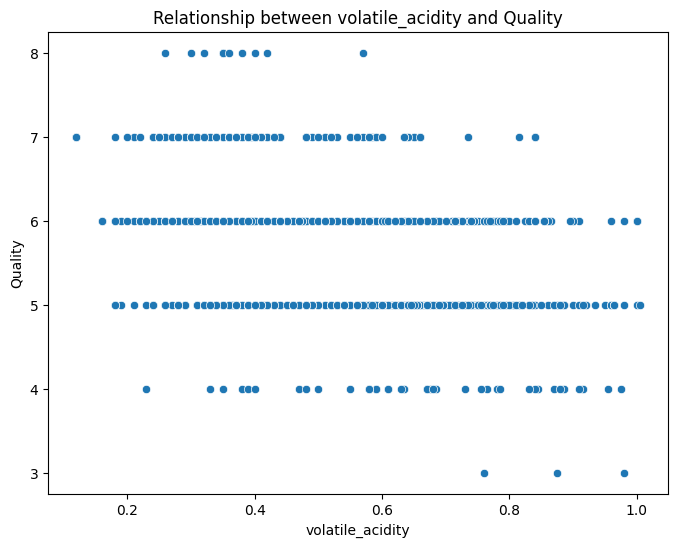

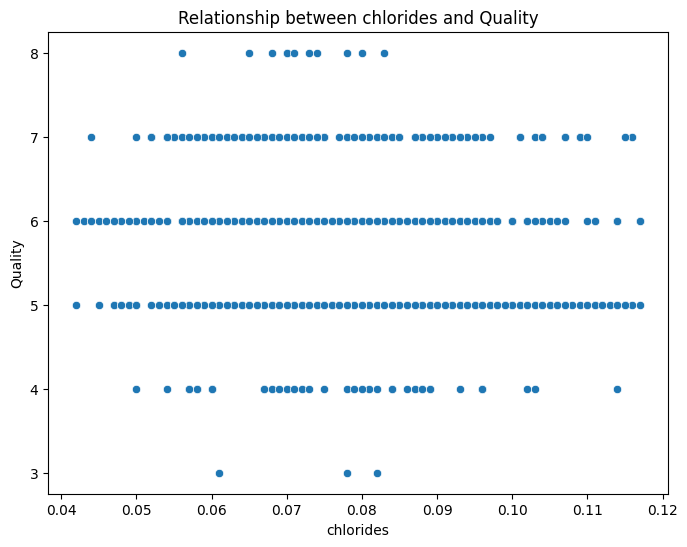

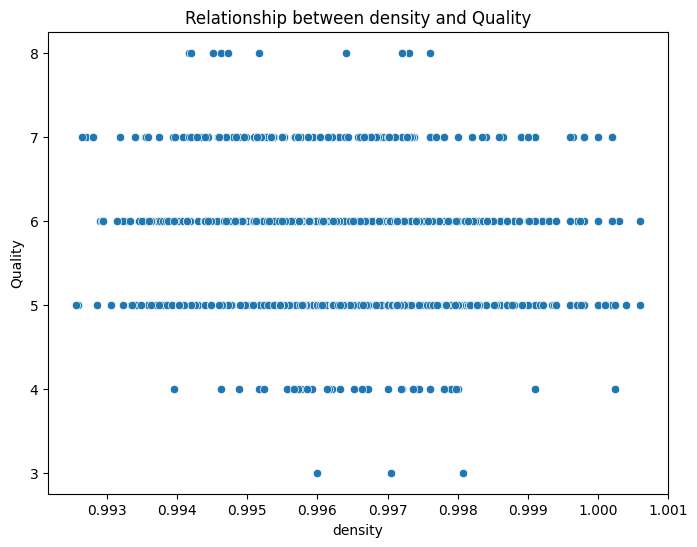

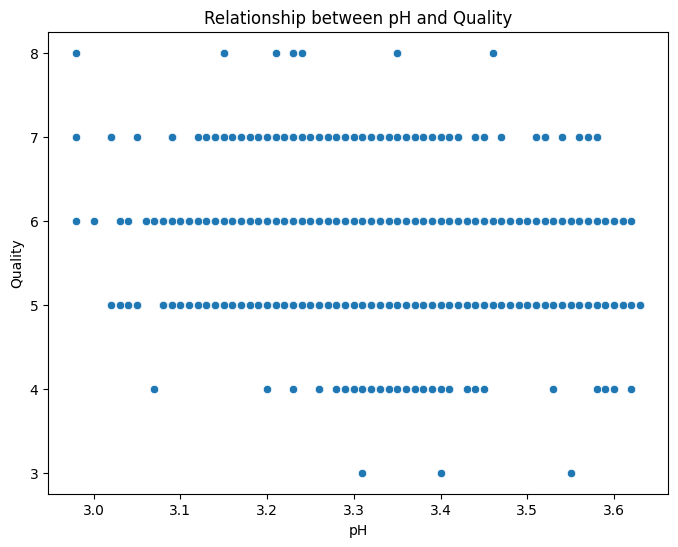

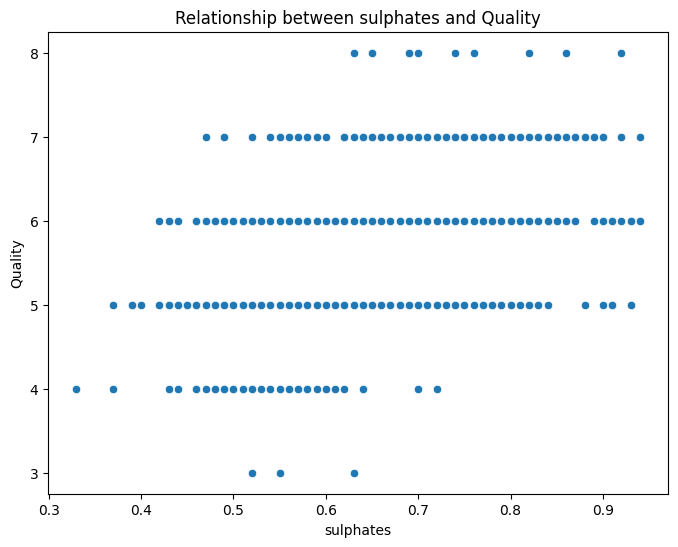

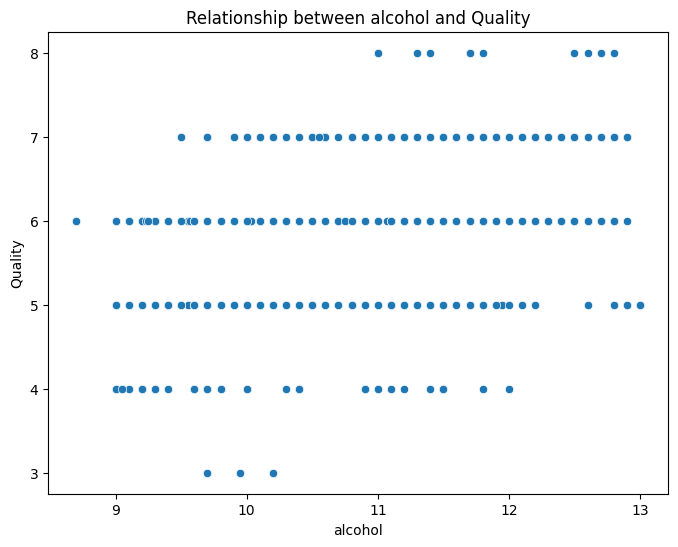

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of explanatory variables
explanatory_vars = ['fixed_acidity', 'volatile_acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

# Create scatter plots
for var in explanatory_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='quality', data=df)
    plt.title(f'Relationship between {var} and Quality')
    plt.xlabel(var)
    plt.ylabel('Quality')
    plt.show()

In [ ]:
def generate_synthetic_data(df, num_samples):
    summary_stats = df.describe().loc[["mean", "std"]].to_dict()
    generated_data = {
        column: np.random.normal(loc=stats["mean"], scale=stats["std"], size=num_samples)
        for column, stats in summary_stats.items()
    }
    generated_df = pd.DataFrame(generated_data)
    return generated_df

In [ ]:
def generate_synthetic_data_linear(df, num_samples):
    summary_stats = df.describe().loc[["min", "max"]].to_dict()
    generated_data = {
        column: np.linspace(start=stats["min"], stop=stats["max"], num=num_samples)
        for column, stats in summary_stats.items()
    }
    generated_df = pd.DataFrame(generated_data)
    return generated_df

In [ ]:
num_synthetic_samples = 1000  # Adjust as needed
synthetic_data = generate_synthetic_data_linear(df, num_synthetic_samples)
synthetic_data2= generate_synthetic_data(df, 1000)

In [ ]:
augmented_df = pd.concat([df, synthetic_data,synthetic_data2], ignore_index=True)

In [ ]:
model_augmented = smf.ols('quality ~ fixed_acidity + volatile_acidity + chlorides + density + pH + sulphates + alcohol', data=augmented_df).fit()
residuals_augmented = model_augmented.resid

statistic, p_value = runs_test(residuals_augmented)

print('Statystyka:', statistic)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
  print('Brak podstaw do odrzucenia hipotezy zerowej o losowości.')
else:
  print('Odrzucamy hipotezę zerową o losowości.')

Statystyka: -20.70868487823771
p-value: 0.0
Odrzucamy hipotezę zerową o losowości.


In [ ]:
augmented_df.describe()

,fixed_acidity,volatile_acidity,chlorides,density,pH,sulphates,alcohol,quality,alcohol_log
count,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
mean,8.327409,0.536395,0.078929,0.996611,3.316225,0.630677,10.505467,5.589836,2.341768
std,1.674944,0.197505,0.016617,0.001818,0.148196,0.135792,1.067441,1.025319,0.100042
min,4.126256,0.027682,0.030534,0.991192,2.893862,0.259601,7.278639,3.000000,2.008595
25%,7.100000,0.390000,0.067721,0.995378,3.210000,0.539416,9.602928,5.000000,2.261763
50%,8.112567,0.530000,0.078672,0.996615,3.320000,0.620000,10.400000,5.642329,2.332144
75%,9.415838,0.666488,0.089827,0.997868,3.420000,0.721444,11.210042,6.074324,2.414673
max,12.949311,1.069480,0.123396,1.001063,3.702564,1.017839,13.603203,8.246866,2.655445


In [ ]:
model_augmented.rsquared

0.5927182311545698

In [ ]:
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed_acidity     3292 non-null   float64
 1   volatile_acidity  3292 non-null   float64
 2   chlorides         3292 non-null   float64
 3   density           3292 non-null   float64
 4   pH                3292 non-null   float64
 5   sulphates         3292 non-null   float64
 6   alcohol           3292 non-null   float64
 7   quality           3292 non-null   float64
 8   alcohol_log       3292 non-null   float64
dtypes: float64(9)
memory usage: 231.6 KB


In [ ]:
influence = model_augmented.get_influence()
leverage = influence.hat_matrix_diag
n = augmented_df.shape[0]
k = len(model_augmented.params)
high_leverage_threshold = 2 * (k + 1) / n
high_leverage_points = augmented_df[leverage > high_leverage_threshold]
print(high_leverage_points)

      fixed_acidity  volatile_acidity  chlorides   density        pH  \
17         7.900000          0.430000   0.106000  0.996600  3.170000   
22         7.900000          0.430000   0.106000  0.996600  3.170000   
37         7.700000          0.935000   0.114000  0.997000  3.250000   
89         7.800000          0.560000   0.104000  0.996400  3.190000   
93         7.800000          0.560000   0.104000  0.996400  3.190000   
...             ...               ...        ...       ...       ...   
3276      10.650561          0.581152   0.080192  0.996216  3.630105   
3280      10.394233          0.342391   0.083558  0.995745  3.566571   
3284       8.342192          0.678381   0.099489  0.993092  3.335516   
3286       6.437917          0.357175   0.082050  0.995628  3.183328   
3288       8.962566          0.027682   0.084207  0.997012  3.366106   

      sulphates    alcohol   quality  alcohol_log  
17     0.910000   9.500000  5.000000     2.251292  
22     0.910000   9.500000  5.0

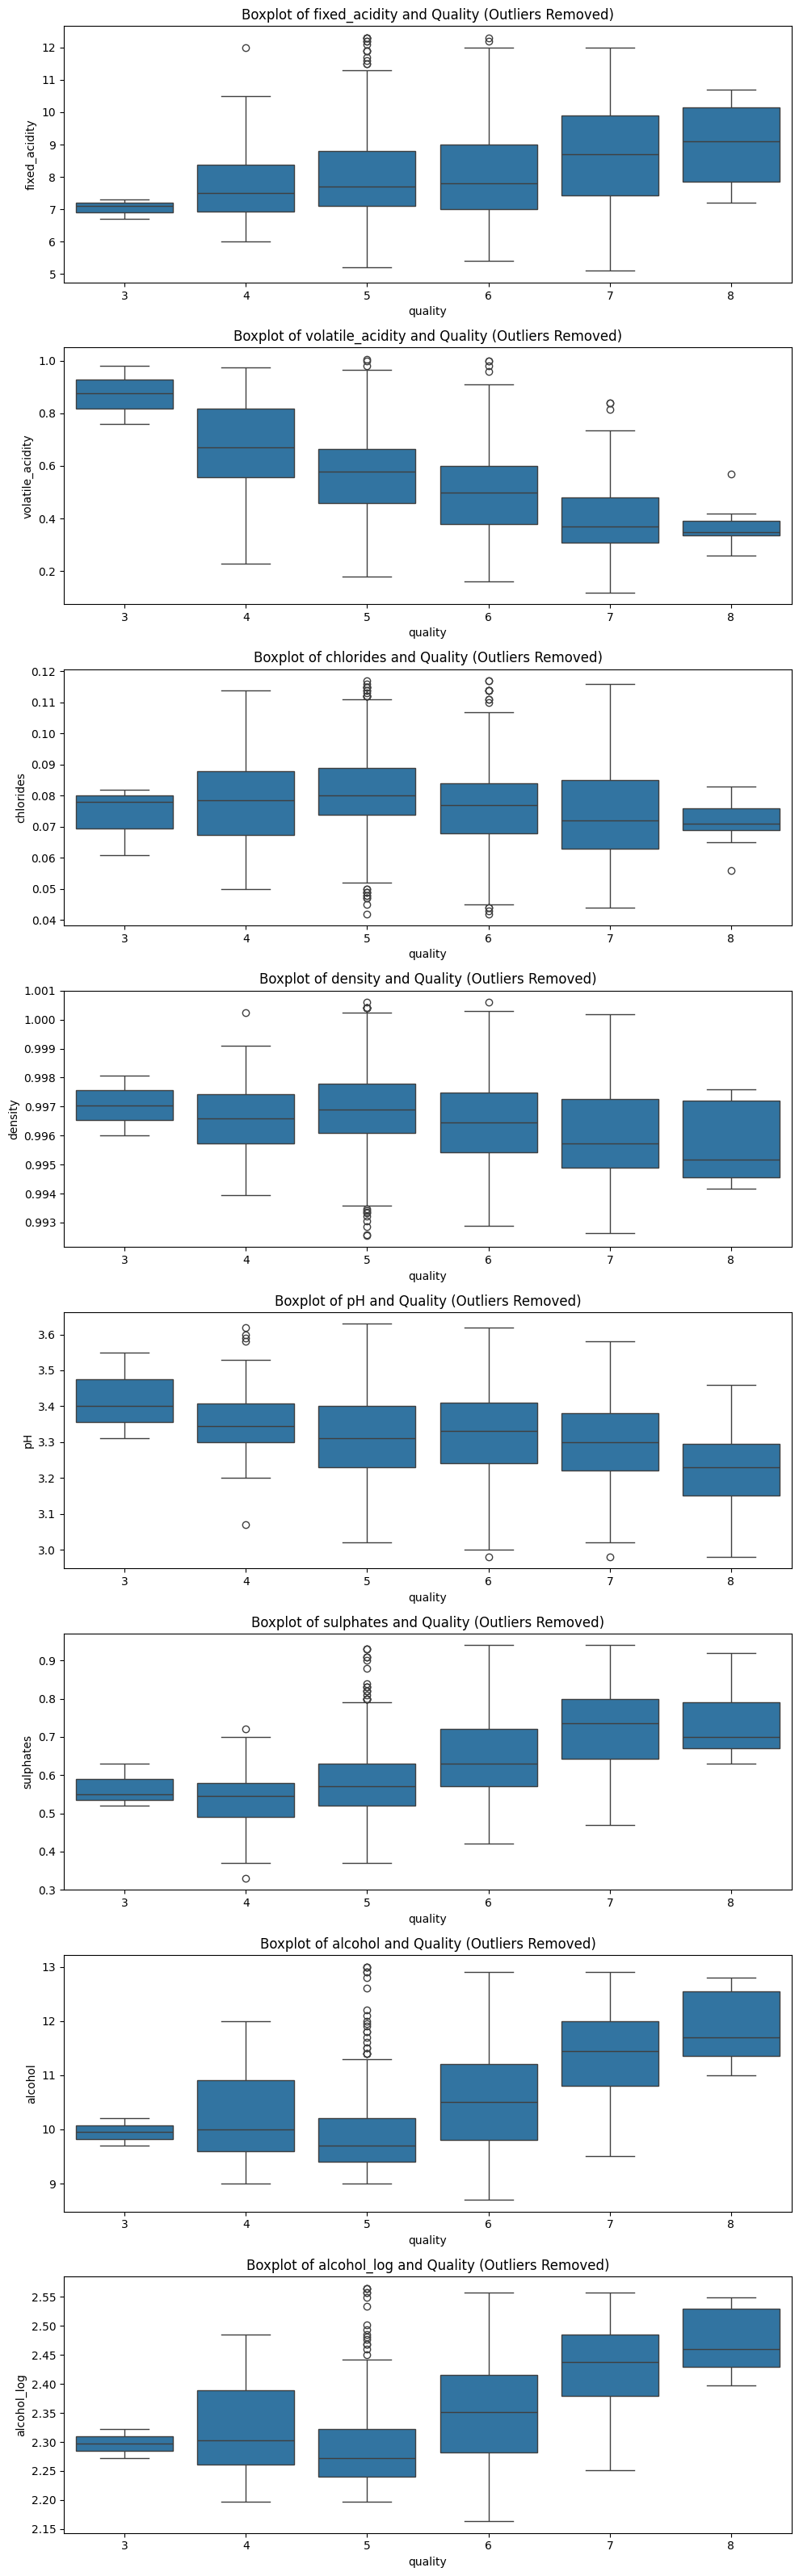

In [ ]:
numerical_features = augmented_df.select_dtypes(include=['number']).columns.drop('quality')
augmented_df = augmented_df[leverage <= high_leverage_threshold]
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

for feature in numerical_features:
    augmented_df = remove_outliers_iqr(augmented_df, feature)


fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 4 * len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='quality', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} and Quality (Outliers Removed)')

plt.tight_layout()
plt.show()

In [ ]:
model_augmented2 = smf.ols('quality ~ fixed_acidity + volatile_acidity + chlorides + density + pH + sulphates + alcohol', data=augmented_df).fit()
model_augmented2.rsquared

0.6171305586225234

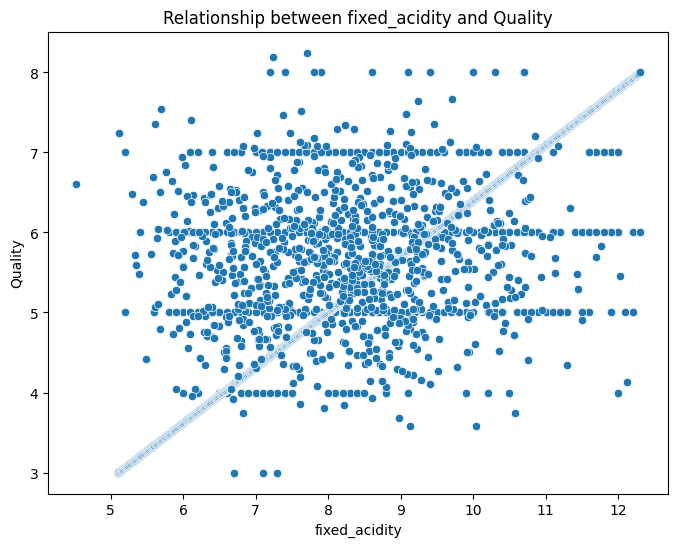

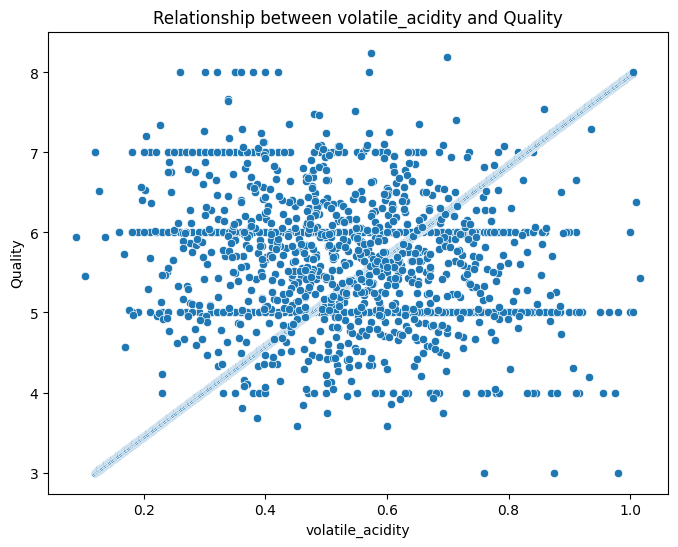

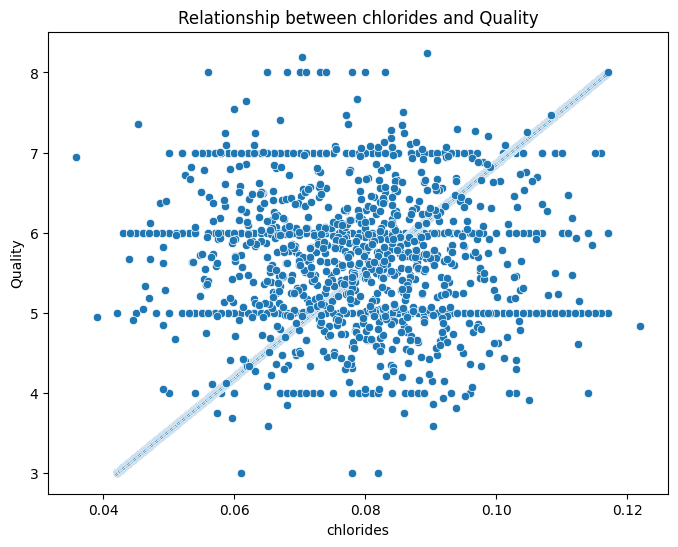

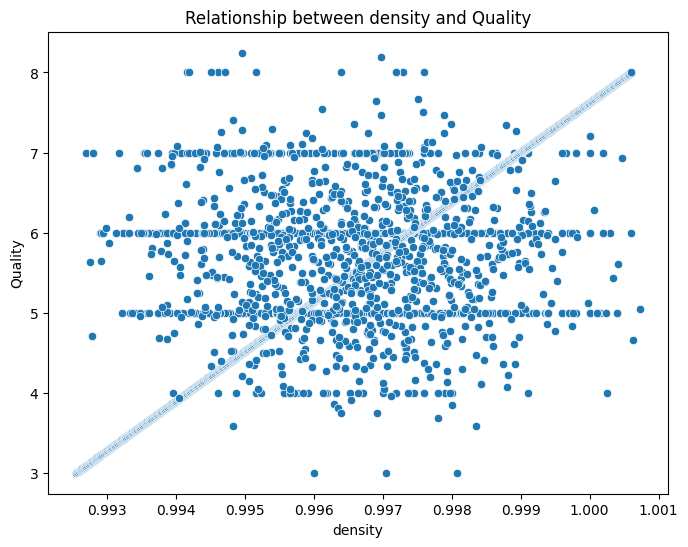

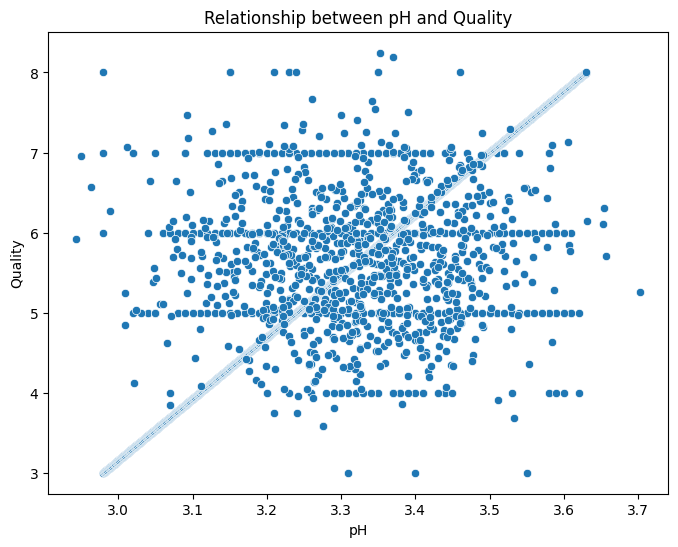

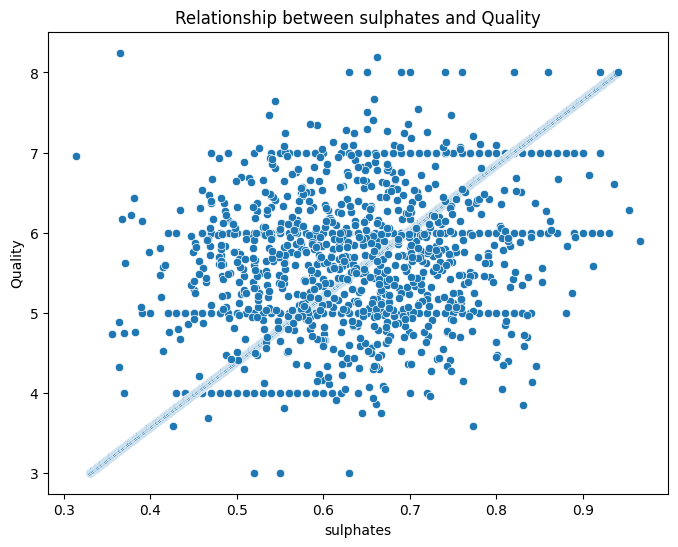

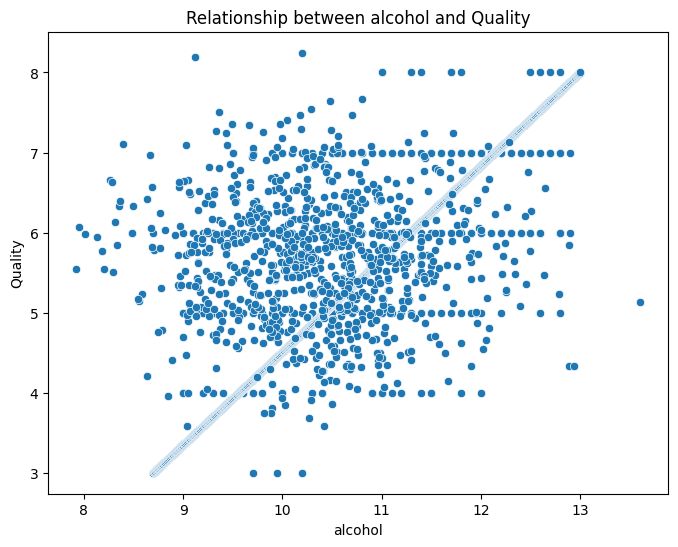

In [ ]:


# List of explanatory variables
explanatory_vars = ['fixed_acidity', 'volatile_acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

# Create scatter plots
for var in explanatory_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='quality', data=augmented_df)
    plt.title(f'Relationship between {var} and Quality')
    plt.xlabel(var)
    plt.ylabel('Quality')
    plt.show()

wnioski: w pierwotnym modelu było najbliżej do osiągniecia losowości reszt, więc ten model pozostawiamy

## Badanie homoskedastyczności

In [ ]:
import statsmodels.stats.diagnostic as smd
white_test = smd.het_white(model2.resid, model2.model.exog)
labels = ['Test statystyczny', 'p-value', 'Statystyka F', 'P-value F']
print(dict(zip(labels, white_test)))
alpha = 0.05
if p_value > alpha:
  print('Brak podstaw do odrzucenia hipotezy zerowej o homoskedastyczności.')
else:
  print('Odrzucamy hipotezę zerową o homoskedastyczności - występuje heteroskedatyczność.')

{'Test statystyczny': 96.37213940958921, 'p-value': 1.2138409335914053e-07, 'Statystyka F': 2.8925246508121414, 'P-value F': 5.68440223931711e-08}
Odrzucamy hipotezę zerową o homoskedastyczności - występuje heteroskedatyczność.


In [ ]:
hg_test = smd.het_breuschpagan(model2.resid, model2.model.exog)
labels = ['Statystyka LM', 'p-value LM', 'Statystyka F', 'P-value F']
print(dict(zip(labels, hg_test)))
if p_value > alpha:
  print('Brak podstaw do odrzucenia hipotezy zerowej o homoskedastyczności.')
else:
  print('Odrzucamy hipotezę zerową o homoskedastyczności - występuje heteroskedatyczność.')

{'Statystyka LM': 28.57778326514794, 'p-value LM': 0.0001727108227069845, 'Statystyka F': 4.149034178351431, 'P-value F': 0.00015898359181232472}
Odrzucamy hipotezę zerową o homoskedastyczności - występuje heteroskedatyczność.


#Wnioski


Modelowanie zakończyło się niepowodzeniem. Należy dobrać inny typ modelu - nie regresję liniową.